# Python機械学習クックブック

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
import pydotplus
from IPython.display import Image
from sklearn import tree

## 決定機を用いたクラス分類器の訓練

In [5]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 決定木クラス分類器オブジェクトを作成
decisiontree = DecisionTreeClassifier(random_state=0)

# 決定木クラス分類器を訓練
model = decisiontree.fit(features, target)

# 決定木クラス分類器を使って観測値を予測
observation = [[5, 4, 3, 2]]
print(model.predict(observation))

# 決定木クラス分類器を使って観測値のクラス確率を予測
print(model.predict_proba(observation))




[1]
[[0. 1. 0.]]


## 決定木回帰器の訓練

In [18]:
import warnings
warnings.simplefilter("ignore")

boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# 決定木回帰器オブジェクトを作成
decisiontree = DecisionTreeRegressor(random_state=0)

# 決定木回帰器を訓練
model = decisiontree.fit(features, target)

# MAEを使って決定木回帰器の性能を評価
decisiontree_mae = DecisionTreeRegressor(random_state=0, criterion="mae")

# 決定木回帰器を訓練
model_mae = decisiontree_mae.fit(features, target)

# 新しい観測値を作成
observation = [[0.02, 16]]

# 2つの回帰器を比較
print("MSEを使ったモデルの予測値:", model.predict(observation))
print("MAEを使ったモデルの予測値:", model_mae.predict(observation))



MSEを使ったモデルの予測値: [33.]
MAEを使ったモデルの予測値: [33.]


## 決定木モデルの可視化

In [21]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 決定木クラス分類器オブジェクトを作成
decisiontree = DecisionTreeClassifier(random_state=0)

# 決定木クラス分類器を訓練
model = decisiontree.fit(features, target)

# DOTデータを作成
dot_data = tree.export_graphviz(
    decisiontree,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)

# グラフを表示
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# PNGファイルを作成
graph.write_png("iris.png")

True

## ランダムフォレストクラス分類機の訓練

In [23]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# ランダムフォレストクラス分類器オブジェクトを作成
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# ランダムフォレストクラス分類器を訓練
model = randomforest.fit(features, target)

# 新しい観測値を作成
observation = [[ 5,  4,  3,  2]]

# ランダムフォレストクラス分類器を使って観測値を予測
print(model.predict(observation))

# ランダムフォレストクラス分類器を使って観測値のクラス確率を予測
print(model.predict_proba(observation))


[1]
[[0.03 0.56 0.41]]


## ランダムフォレストの重要な特徴量の特定

[0.09090795 0.02453104 0.46044474 0.42411627]


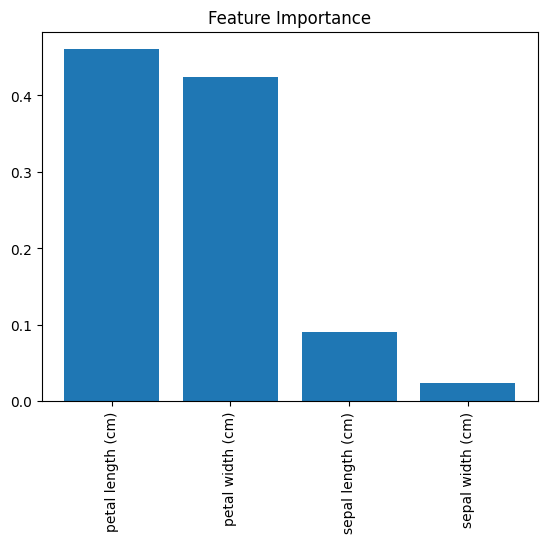

In [30]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# ランダムフォレスト回帰器オブジェクトを作成
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# ランダムフォレスト回帰器を訓練
model = randomforest.fit(features, target)

# 特徴量の重要度を取得
importances = model.feature_importances_
print(importances)

# 重要度順に特徴量のインデックスを取得
indices = np.argsort(importances)[::-1]

# 重要度順に特徴量の名前を並び替え
names = [iris.feature_names[i] for i in indices]

# グラフの設定
plt.figure()

# グラフのタイトル
plt.title("Feature Importance")

# 棒グラフを追加
plt.bar(range(features.shape[1]), importances[indices])

# X軸のラベル
plt.xticks(range(features.shape[1]), names, rotation=90)

# グラフを表示
plt.show()



## ランダムフォレストにおける重要な特徴量の選択

In [38]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# ランダムフォレストクラス分類器オブジェクトを作成
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# 重要度が閾値を超える特徴量だけを選択
selector = SelectFromModel(randomforest, threshold=0.3)

# 選択した特徴量を使って新しい特徴量行列を作成
features_important = selector.fit_transform(features, target)

# 選択された重要度の高い特徴量を用いてランダムフォレストクラス分類器を訓練
model = randomforest.fit(features_important, target)


## 不均等なクラスの処理

In [39]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

features = features[40:,:]
target = target[40:]

# クラス0をネガティブクラス(0)、それ以外をポジティブクラス(1)とする
target = np.where((target == 0), 0, 1)

# ランダムフォレストクラス分類器オブジェクトを作成
# balancedを設定することで、データの頻度に逆比例した重みを与える
randomforest = RandomForestClassifier(
    random_state=0, n_jobs=-1, class_weight="balanced")

# ランダムフォレストクラス分類器を訓練
model = randomforest.fit(features, target)


## 決定機のサイズの制御

In [40]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 決定木クラス分類器オブジェクトを作成
decisiontree = DecisionTreeClassifier(
    random_state=0,
    max_depth=None,  # 木の深さの最大値
    min_samples_split=2,  # ノードを分割するために必要なサンプルの最小数
    min_samples_leaf=1,  # 葉ノードが必要とする最小サンプル数
    min_weight_fraction_leaf=0,  # 重み付けされた合計サンプルの割合
    max_leaf_nodes=None,  # 葉ノードの最大数
    min_impurity_decrease=0,  # 分割を行うための不純度の減少量
)

# 決定木クラス分類器を訓練
model = decisiontree.fit(features, target)

## ブースティングによる性能の向上

In [44]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# adaブースティング木クラス分類器オブジェクトを作成
adaboost = AdaBoostClassifier(random_state=0)

# adaブースティング木クラス分類器を訓練
model = adaboost.fit(features, target)


## OOBエラーによる評価
交差検証を用いずにランダムフォレストモデルを評価できる

In [45]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# らんだむフォレストクラス分類器オブジェクトを作成
randomforest = RandomForestClassifier(
    random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

# ランダムフォレストクラス分類器を訓練
model = randomforest.fit(features, target)

# out-of-bag(袋外)サンプルのクラス予測確率を取得
print(model.oob_score_)


0.9533333333333334
